In [ ]:
!pip install --upgrade plotly

     |████████████████████████████████| 13.2MB 250kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
import datetime as dt
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader as web

In [ ]:
# Get the stock quote
crypto_currency = 'BNB'  # BTC
against_currency = 'EUR'
data_source ='yahoo'
period = 100

start = dt.datetime(2012, 1, 1)
end = dt.datetime.now()

ticket = f'{crypto_currency}-{against_currency}'

df = web.DataReader(ticket, data_source=data_source, start=start, end=end)

df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-06-04,350.060547,308.277710,321.320435,320.906097,3.251657e+09,320.906097
2021-06-05,328.804230,314.259277,320.745697,323.670990,1.727514e+09,323.670990
2021-06-06,334.970764,291.962524,323.534943,293.065826,2.400923e+09,293.065826
2021-06-07,300.200470,262.929169,293.767303,290.813904,3.689479e+09,290.813904
2021-06-09,298.552460,274.597870,291.120483,291.145508,3.171823e+09,291.145508


In [ ]:
df.dtypes

High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Adj Close    float64
dtype: object

In [ ]:
df.index

DatetimeIndex(['2019-09-17', '2019-09-18', '2019-09-19', '2019-09-20',
               '2019-09-21', '2019-09-22', '2019-09-23', '2019-09-24',
               '2019-09-25', '2019-09-26',
               ...
               '2021-05-29', '2021-05-30', '2021-05-31', '2021-06-01',
               '2021-06-02', '2021-06-03', '2021-06-04', '2021-06-05',
               '2021-06-06', '2021-06-08'],
              dtype='datetime64[ns]', name='Date', length=626, freq=None)

In [ ]:
df['Normalized'] = df['Close'] / df['Close'].iloc[0]
df['Normalized'].min(), df['Normalized'].argmin(), df['Normalized'].max(), df['Normalized'].argmax(), df['Normalized'].mean(), df['Normalized'].std()

(0.4167874369878565,
 180,
 27.767482000243874,
 589,
 3.757344082719119,
 6.3585445869093595)

In [ ]:
df.iloc[180], df.iloc[589]

(High          9.373597e+00
 Low           7.800969e+00
 Open          9.348001e+00
 Close         8.410117e+00
 Volume        2.821938e+08
 Adj Close     8.410117e+00
 Normalized    4.167874e-01
 Name: 2020-03-16 00:00:00, dtype: float64, High          5.633906e+02
 Low           5.171102e+02
 Open          5.171102e+02
 Close         5.603043e+02
 Volume        4.374132e+09
 Adj Close     5.603043e+02
 Normalized    2.776748e+01
 Name: 2021-05-02 00:00:00, dtype: float64)

In [ ]:
df.drop(labels=['Normalized'], axis=1, inplace=True)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-09-17,20.764502,19.045027,18.967968,20.178432,334962380.0,20.178432
2019-09-18,20.356382,18.677210,20.166338,19.565147,225865048.0,19.565147
2019-09-19,19.637375,19.142324,19.581095,19.393864,180575314.0,19.393864
2019-09-20,19.547403,19.047874,19.402020,19.131342,158910224.0,19.131342
2019-09-21,19.143307,18.381638,19.141096,18.627089,139527099.0,18.627089


In [ ]:
df.reset_index(inplace = True)
df.set_index(["Date"])
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2019-09-17,20.764502,19.045027,18.967968,20.178432,334962380.0,20.178432
1,2019-09-18,20.356382,18.677210,20.166338,19.565147,225865048.0,19.565147
2,2019-09-19,19.637375,19.142324,19.581095,19.393864,180575314.0,19.393864
3,2019-09-20,19.547403,19.047874,19.402020,19.131342,158910224.0,19.131342
4,2019-09-21,19.143307,18.381638,19.141096,18.627089,139527099.0,18.627089


In [ ]:
sma = df['Close'].rolling(window=20).mean()  # Simple moving average (SMA)
std = df['Close'].rolling(window=20).std()  # Standard deviation
df['Upper'] = sma + (std *2)  # Bollinger band
df['Lower'] = sma - (std *2)  # Bollinger band

df['Short'] = df.Close.ewm(span=20, adjust=False).mean()  # Exponential moving average 20 days
df['Long'] = df.Close.ewm(span=50, adjust=False).mean()  # Exponential moving average 50 days

df['20MA'] = sma  # 20 moving average (20MA)
df['50MA'] = df['Close'].rolling(window=50).mean()  # 50 moving average (50MA)
df['200MA'] = df['Close'].rolling(window=200).mean()  # 200 moving average (200MA)

shortema = df.Close.ewm(span=12, adjust=False).mean()  # Exponential moving average 12 days
longema = df.Close.ewm(span=26, adjust=False).mean()  # Exponential moving average 26 days
df['MACD'] = shortema - longema  # MACD
df['Signal'] = df.MACD.ewm(span=9, adjust=False).mean()  # Exponential moving average 9 days

high14 = df['High'].rolling(14).max()
low14 = df['Low'].rolling(14).min()
df['%K'] = (df['Close'] - low14)*100/(high14 - low14)
df['%D'] = df['%K'].rolling(3).mean()

df['PClose'] = df['Adj Close'].shift()  # previous Close
df['High-Low'] = df['High'] - df['Low']  # Condition 1: High - Low
df['High-PClose'] = abs(df['High'] - df['PClose'])  # Condition 2: High - Previous Close
df['Low-PClose'] = abs(df['Low'] - df['PClose'])  # Condition 3: Low - Previous Close
df['TrueRange'] = df[['High-Low', 'High-PClose', 'Low-PClose']].max(axis=1) # True Range
df['ATR'] = df.TrueRange.rolling(window=14).mean() / df['Adj Close'] *100  # Average True Range 14 days %

df

,Date,High,Low,Open,Close,Volume,Adj Close,Upper,Lower,Short,Long,20MA,50MA,200MA,MACD,Signal,%K,%D,PClose,High-Low,High-PClose,Low-PClose,TrueRange,ATR
0,2019-09-17,20.764502,19.045027,18.967968,20.178432,3.349624e+08,20.178432,NaN,NaN,20.178432,20.178432,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,1.719475,NaN,NaN,1.719475,NaN
1,2019-09-18,20.356382,18.677210,20.166338,19.565147,2.258650e+08,19.565147,NaN,NaN,20.120024,20.154382,NaN,NaN,NaN,-0.048923,-0.009785,NaN,NaN,20.178432,1.679173,0.177950,1.501223,1.679173,NaN
2,2019-09-19,19.637375,19.142324,19.581095,19.393864,1.805753e+08,19.393864,NaN,NaN,20.050866,20.124558,NaN,NaN,NaN,-0.100359,-0.027900,NaN,NaN,19.565147,0.495050,0.072227,0.422823,0.495050,NaN
3,2019-09-20,19.547403,19.047874,19.402020,19.131342,1.589102e+08,19.131342,NaN,NaN,19.963292,20.085608,NaN,NaN,NaN,-0.160456,-0.054411,NaN,NaN,19.393864,0.499529,0.153540,0.345989,0.499529,NaN
4,2019-09-21,19.143307,18.381638,19.141096,18.627089,1.395271e+08,18.627089,NaN,NaN,19.836035,20.028411,NaN,NaN,NaN,-0.245938,-0.092716,NaN,NaN,19.131342,0.761669,0.011965,0.749704,0.761669,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622,2021-06-04,350.060547,308.277710,321.320435,320.906097,3.251657e+09,320.906097,404.475598,199.752931,328.377024,358.459435,302.114265,410.588927,195.722223,-26.778197,-37.333443,81.163363,87.206605,321.679199,41.782837,28.381348,13.401489,41.782837,14.630191
623,2021-06-05,328.804230,314.259277,320.745697,323.670990,1.727514e+09,323.670990,383.802393,210.678889,327.928831,357.095182,297.240641,408.375665,197.222067,-23.994201,-34.665595,78.209159,80.322259,320.906097,14.544952,7.898132,6.646820,14.544952,13.013801
624,2021-06-06,334.970764,291.962524,323.534943,293.065826,2.400923e+09,293.065826,357.346151,224.877309,324.608545,354.584227,291.111730,406.198871,198.569011,-23.981008,-32.528677,46.174808,68.515777,323.670990,43.008240,11.299774,31.708466,43.008240,13.606790
625,2021-06-07,300.200470,262.929169,293.767303,290.813904,3.689479e+09,290.813904,357.696141,225.752545,321.390007,352.083430,291.724343,403.625949,199.901243,-23.877024,-30.798347,44.208290,56.197419,293.065826,37.271301,7.134644,30.136658,37.271301,13.270501


In [ ]:
df = df.loc[df.shape[0]-period:]
df.reset_index(inplace = True)
df.head()

,index,Date,High,Low,Open,Close,Volume,Adj Close,Upper,Lower,Short,Long,20MA,50MA,200MA,MACD,Signal,%K,%D,PClose,High-Low,High-PClose,Low-PClose,TrueRange,ATR
0,527,2021-03-02,219.236755,189.205536,211.602356,198.200348,4.867461e+09,198.200348,274.177637,70.218434,169.056532,117.677536,172.198035,94.975980,41.910806,31.692224,35.268481,52.398232,50.938165,211.333939,30.031219,7.902817,22.128403,30.031219,24.017298
1,528,2021-03-03,210.106049,196.036072,198.338074,200.134766,4.837696e+09,200.134766,274.253866,79.897844,172.016364,120.911152,177.075855,98.354332,42.819260,30.363517,34.287488,43.835182,52.036146,198.200348,14.069977,11.905701,2.164276,14.069977,22.847196
2,529,2021-03-04,206.845657,188.838348,200.096680,192.146011,4.663027e+09,192.146011,273.558448,88.508634,173.933473,123.704676,181.033541,101.537227,43.686579,28.339204,33.097831,28.114036,41.449150,200.134766,18.007309,6.710892,11.296417,18.007309,23.370396
3,530,2021-03-05,192.899796,180.848679,192.054276,190.049271,4.172224e+09,190.049271,271.353221,98.708288,175.468311,126.306425,185.030754,104.650295,44.539422,26.262988,31.730862,27.954776,33.301331,192.146011,12.051117,0.753784,11.297333,12.051117,19.526301
4,531,2021-03-06,194.777618,184.687225,189.902527,190.219055,3.767748e+09,190.219055,268.210769,109.616816,176.873144,128.812803,188.913793,107.777181,45.393317,24.350574,30.254805,34.511100,30.193304,190.049271,10.090393,4.728348,5.362045,10.090393,16.586387


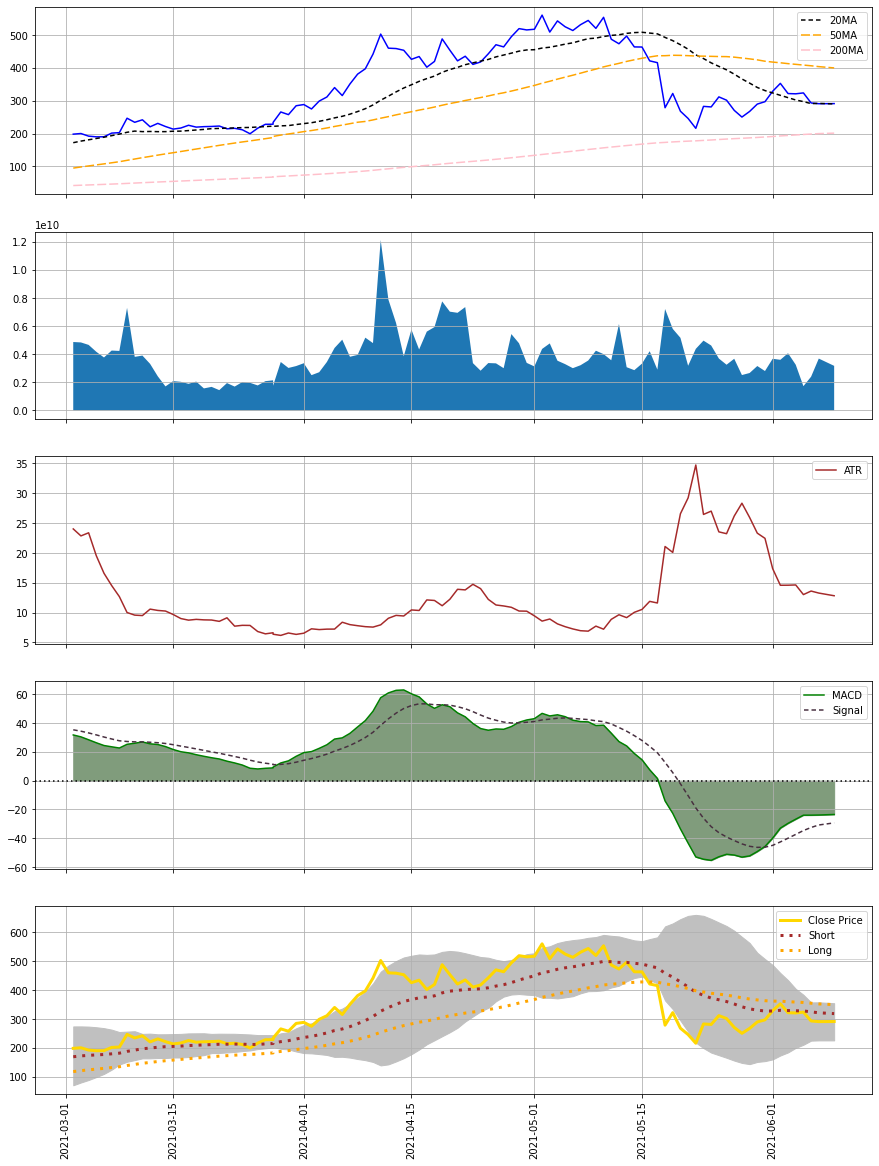

In [ ]:
fig, axs = plt.subplots(5, 1, figsize=(15, 20))

# Closed Price + 20MA + 50MA
axs[0].plot(df['Date'], df['Close'], color='blue')
axs[0].plot(df['Date'], df['20MA'], label='20MA', color='black', dashes=[3, 2])
axs[0].plot(df['Date'], df['50MA'], label='50MA', color='orange', dashes=[6, 2])
axs[0].plot(df['Date'], df['200MA'], label='200MA', color='pink', dashes=[6, 2])
axs[0].set(xticklabels=[])
axs[0].grid(True)
axs[0].legend(loc="upper right")

# Volume
axs[1].fill_between(df['Date'], df['Volume'])
axs[1].set(xticklabels=[])
axs[1].grid(True)

# ATR
axs[2].plot(df['Date'], df['ATR'], label='ATR', color='brown')
axs[2].set(xticklabels=[])
axs[2].grid(True)
axs[2].legend(loc="upper right")

# MACD
axs[3].plot(df['Date'], df['MACD'], label='MACD', color='green')
axs[3].plot(df['Date'], df['Signal'], label='Signal', color='#483040', dashes=[3, 2])
axs[3].fill_between(df['Date'], df['MACD'], color='#809C7C')
axs[3].axhline(y = 0, color = 'black', dashes=[1, 2])
axs[3].set(xticklabels=[])
axs[3].grid(True)
axs[3].legend(loc="upper right")

# Bolinger
axs[4].fill_between(df['Date'], df['Upper'], df['Lower'], color='silver')
axs[4].plot(df['Date'], df['Close'], color='gold', lw=3, label='Close Price')
axs[4].plot(df['Date'], df['Short'], color='brown', dashes=[1, 2], lw=3, label='Short')
axs[4].plot(df['Date'], df['Long'], color='orange', dashes=[1, 2], lw=3, label='Long')
axs[4].tick_params(axis='x', rotation=90)
axs[4].grid(True)
axs[4].legend(loc="upper right")

# fig.tight_layout()
plt.show()

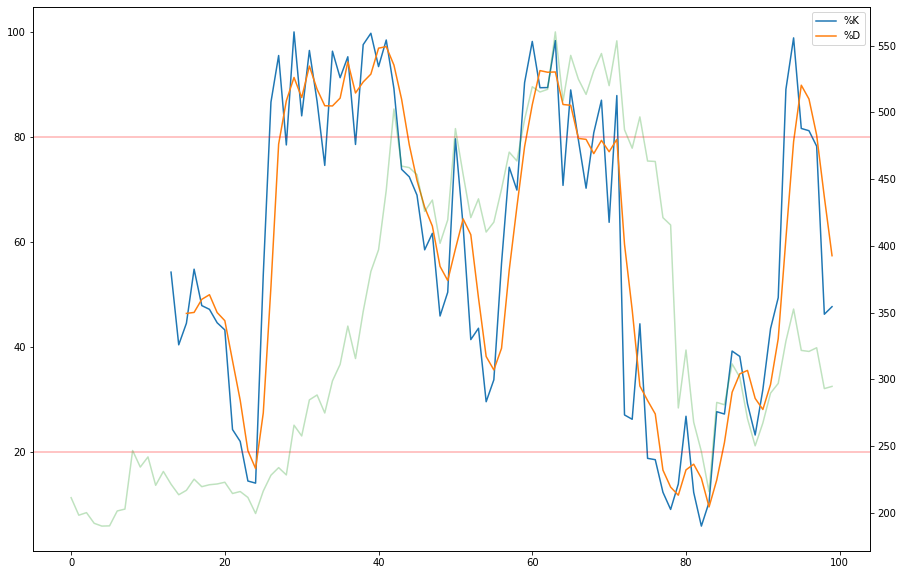

In [ ]:
# Stochastic oscillator
fig, ax = plt.subplots(figsize=(15, 10))
df[['%K', '%D']].plot(ax=ax)
ax.axhline(80, c='r', alpha=0.3)
ax.axhline(20, c='r', alpha=0.3)
df['Close'].plot(ax=ax, alpha=0.3, secondary_y=True)

In [ ]:
import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots

pd.options.plotting.backend = "plotly"

In [ ]:
Closed_Price = go.Scatter(
    x=df['Date'],
    y=df['Close'],
    name='Price',
    line_color='blue',
)
MA20 = go.Scatter(
    x=df['Date'],
    y=df['20MA'],
    name='20MA',
    line_color='black',
)
MA50 = go.Scatter(
    x=df['Date'],
    y=df['50MA'],
    name='50MA',
    line_color='orange',
)
MA200 = go.Scatter(
    x=df['Date'],
    y=df['200MA'],
    name='200MA',
    line_color='pink',
)
Short = go.Scatter(
    x=df['Date'],
    y=df['Short'],
    name='Short',
    line_color='green',
    line_dash='dot',
)
Long = go.Scatter(
    x=df['Date'],
    y=df['Long'],
    name='Long',
    line_color='green',
    line_dash='dash',
)
Upper = go.Scatter(
    x=df['Date'],
    y=df['Upper'],
    name='Upper',
    line_color='silver',
)
Lower = go.Scatter(
    x=df['Date'],
    y=df['Lower'],
    name='Lower',
    fill='tonexty', # fill area between
    mode='lines',
    line_color='silver',
)
data = [Closed_Price, MA20, MA50, MA200, Short, Long, Upper, Lower]
layout = go.Layout(yaxis=dict())
fig = go.Figure(data=data, layout=layout)
fig.update_layout(
    title='Closed Price',
    yaxis_title='Price',
    xaxis_title='Dates',
    legend_title='Indicator',
    )
fig.show()

In [ ]:
Volume = go.Scatter(
    x=df['Date'],
    y=df['Volume'],
    name='Volume',
    line_color='blue',
    fill='tonexty', # fill area between
    mode='lines',
)
layout = go.Layout(yaxis=dict())
fig = go.Figure(data=Volume, layout=layout)
#fig.add_hline(y=0, line_color="green")
fig.update_layout(
    title='Volume',
    yaxis_title='Operations',
    xaxis_title='Dates',
    xaxis_tickangle=-90,
    legend_title='Indicator',
    )
fig.show()

In [ ]:
ATR = go.Scatter(
    x=df['Date'],
    y=df['ATR'],
    name='ATR',
    line_color='brown',
    )
layout = go.Layout(yaxis=dict())
fig = go.Figure(data=ATR, layout=layout)
fig.update_layout(
        title='ATR',
        yaxis_title='ATR %',
        xaxis_title='Dates',
        legend_title='Indicator',
)
fig.show()

In [ ]:
MACD = go.Scatter(
    x=df['Date'],
    y=df['MACD'],
    name='MACD',
    line_color='green',
    fill='tonexty', # fill area between
    mode='lines',
)
Signal = go.Scatter(
    x=df['Date'],
    y=df['Signal'],
    name='Signal',
    line_color='purple',
    line_dash='dot',
)
data = [MACD, Signal]
layout = go.Layout(yaxis=dict())
fig = go.Figure(data=data, layout=layout)
fig.add_hline(y=0, line_color="green")
fig.update_layout(
    title='MACD',
    yaxis_title='MACD',
    xaxis_title='Dates',
    legend_title='Indicator',
    )
fig.show()

In [ ]:
# data2 = web.get_data_stooq(ticket, start)
# nasdaq_sym = web.get_nasdaq_symbols()
# nasdaq_sym.loc['AAPL']

Nasdaq Traded                            True
Security Name       Apple Inc. - Common Stock
Listing Exchange                            Q
Market Category                             Q
ETF                                     False
Round Lot Size                            100
Test Issue                              False
Financial Status                            N
CQS Symbol                                NaN
NASDAQ Symbol                            AAPL
NextShares                              False
Name: AAPL, dtype: object

In [ ]:
df['%-chg'] = df['Close'].pct_change()
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,index,Date,High,Low,Open,Close,Volume,Adj Close,Upper,Lower,Short,Long,20MA,50MA,200MA,MACD,Signal,%K,%D,PClose,High-Low,High-PClose,Low-PClose,TrueRange,ATR,%-chg
0,526,2021-03-01,215.489685,173.646317,173.646317,211.333939,4.156678e+09,211.333939,272.823677,62.457854,165.988762,114.390890,167.640765,91.643044,41.010368,33.124120,36.162545,59.875026,49.385783,173.334595,41.843369,42.155090,0.311722,42.155090,21.676742,NaN
1,527,2021-03-02,219.236755,189.205536,211.602356,198.200348,4.867461e+09,198.200348,274.177637,70.218434,169.056532,117.677536,172.198035,94.975980,41.910806,31.692224,35.268481,52.398232,50.938165,211.333939,30.031219,7.902817,22.128403,30.031219,24.017298,-0.062146
2,528,2021-03-03,210.106049,196.036072,198.338074,200.134766,4.837696e+09,200.134766,274.253866,79.897844,172.016364,120.911152,177.075855,98.354332,42.819260,30.363517,34.287488,43.835182,52.036146,198.200348,14.069977,11.905701,2.164276,14.069977,22.847196,0.009760
3,529,2021-03-04,206.845657,188.838348,200.096680,192.146011,4.663027e+09,192.146011,273.558448,88.508634,173.933473,123.704676,181.033541,101.537227,43.686579,28.339204,33.097831,28.114036,41.449150,200.134766,18.007309,6.710892,11.296417,18.007309,23.370396,-0.039917
4,530,2021-03-05,192.899796,180.848679,192.054276,190.049271,4.172224e+09,190.049271,271.353221,98.708288,175.468311,126.306425,185.030754,104.650295,44.539422,26.262988,31.730862,27.954776,33.301331,192.146011,12.051117,0.753784,11.297333,12.051117,19.526301,-0.010912


In [ ]:
df['Log returns'] = np.log(df['Close']/df['Close'].shift())
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,index,Date,High,Low,Open,Close,Volume,Adj Close,Upper,Lower,Short,Long,20MA,50MA,200MA,MACD,Signal,%K,%D,PClose,High-Low,High-PClose,Low-PClose,TrueRange,ATR,%-chg,Log returns
0,526,2021-03-01,215.489685,173.646317,173.646317,211.333939,4.156678e+09,211.333939,272.823677,62.457854,165.988762,114.390890,167.640765,91.643044,41.010368,33.124120,36.162545,59.875026,49.385783,173.334595,41.843369,42.155090,0.311722,42.155090,21.676742,NaN,NaN
1,527,2021-03-02,219.236755,189.205536,211.602356,198.200348,4.867461e+09,198.200348,274.177637,70.218434,169.056532,117.677536,172.198035,94.975980,41.910806,31.692224,35.268481,52.398232,50.938165,211.333939,30.031219,7.902817,22.128403,30.031219,24.017298,-0.062146,-0.064161
2,528,2021-03-03,210.106049,196.036072,198.338074,200.134766,4.837696e+09,200.134766,274.253866,79.897844,172.016364,120.911152,177.075855,98.354332,42.819260,30.363517,34.287488,43.835182,52.036146,198.200348,14.069977,11.905701,2.164276,14.069977,22.847196,0.009760,0.009713
3,529,2021-03-04,206.845657,188.838348,200.096680,192.146011,4.663027e+09,192.146011,273.558448,88.508634,173.933473,123.704676,181.033541,101.537227,43.686579,28.339204,33.097831,28.114036,41.449150,200.134766,18.007309,6.710892,11.296417,18.007309,23.370396,-0.039917,-0.040735
4,530,2021-03-05,192.899796,180.848679,192.054276,190.049271,4.172224e+09,190.049271,271.353221,98.708288,175.468311,126.306425,185.030754,104.650295,44.539422,26.262988,31.730862,27.954776,33.301331,192.146011,12.051117,0.753784,11.297333,12.051117,19.526301,-0.010912,-0.010972


In [ ]:
dpy = 252  # Working days per year
volatility = df['Log returns'].std()*dpy**.5
volatility

1.352054834910482